## import stuff

In [1]:
#importing things
import pandas as pd
import os
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import sem
import scipy.stats as st
from scipy.linalg import hadamard
from scipy.stats import ttest_ind_from_stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from sklearn.manifold import TSNE
from scipy.stats import pearsonr
from collections import OrderedDict
import seaborn as sns
import colorsys
from functools import reduce
from scipy.optimize import curve_fit
from operator import itemgetter
import math
import matplotlib.colors as mcolors

def lighten_color(color, amount=0.5):  
    # --------------------- SOURCE: @IanHincks ---------------------
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

# correlation between replicates

In [2]:
ch65d = pd.DataFrame(pd.read_csv('../../Kd_inference/results_CH65/Kds/Kds_CH65d.tsv',delimiter='\t',dtype={'geno': str}),columns=('geno', 'Mean fluorescence expression'))
ch65e = pd.DataFrame(pd.read_csv('../../Kd_inference/results_CH65/Kds/Kds_CH65e.tsv',delimiter='\t',dtype={'geno': str}),columns=('geno', 'Mean fluorescence expression'))
kd = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20220603_CH65_QCfilt_REPfilt.csv',delimiter=',',dtype={'geno': str}),columns=('geno','MA90_mean','SI06_mean','G189E_mean'))
#merge on genotype
CH65_expression = pd.DataFrame()
CH65_expression = pd.merge(ch65d, ch65e, on='geno',how='outer')
CH65_expression = pd.merge(CH65_expression, kd, on='geno',how='outer')
CH65_expression['som_mut']=CH65_expression['geno'].apply(sum_digits)
print(np.mean(CH65_expression['Mean fluorescence expression_x']),np.mean(CH65_expression['Mean fluorescence expression_y']))
CH65_expression['exp_repd_norm']=CH65_expression['Mean fluorescence expression_x']/np.mean(CH65_expression['Mean fluorescence expression_x'])
CH65_expression['exp_repe_norm']=CH65_expression['Mean fluorescence expression_y']/np.mean(CH65_expression['Mean fluorescence expression_y'])
CH65_expression['exp_norm_mean']=CH65_expression[['exp_repd_norm','exp_repe_norm']].mean(axis=1)
CH65_expression['exp_norm_sem']=CH65_expression[['exp_repd_norm','exp_repe_norm']].sem(axis=1)
CH65_expression.to_csv('CH65_expression_Kd_toplot.csv')
CH65_expression

3.4116523961323058 3.385740746771407


,geno,Mean fluorescence expression_x,Mean fluorescence expression_y,MA90_mean,SI06_mean,G189E_mean,som_mut,exp_repd_norm,exp_repe_norm,exp_norm_mean,exp_norm_sem
0,0000000000000000,3.568899,3.277206,8.542521,6.000000,6.000000,0,1.046091,0.967943,1.007017,0.039074
1,0000000000000001,3.416304,3.192240,8.574179,6.000000,6.000000,1,1.001364,0.942848,0.972106,0.029258
2,0000000000000010,3.555357,3.377397,8.315518,6.000000,6.000000,1,1.042122,0.997536,1.019829,0.022293
3,0000000000000011,3.571305,3.613703,8.473877,6.000000,6.000000,2,1.046796,1.067330,1.057063,0.010267
4,0000000000000100,3.576899,3.241554,8.537724,6.000000,6.000000,1,1.048436,0.957413,1.002925,0.045511
...,...,...,...,...,...,...,...,...,...,...,...
65531,1111111111111011,3.226016,3.476313,10.106582,9.141153,9.646027,15,0.945588,1.026751,0.986169,0.040582
65532,1111111111111100,3.112689,3.371669,10.065900,8.789993,9.500674,14,0.912370,0.995844,0.954107,0.041737
65533,1111111111111101,3.474310,3.492683,10.133731,9.010419,9.528151,15,1.018366,1.031586,1.024976,0.006610
65534,1111111111111110,3.565554,3.442400,9.967843,8.625453,9.467154,15,1.045111,1.016735,1.030923,0.014188


/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/angelaphillips/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


0.28326270957329946


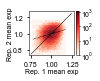

In [3]:
#CH65
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_repd_norm', 'exp_repe_norm']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_repd_norm'], plotting['exp_repe_norm'],cmap='Reds',bins='log',linewidths=0.2,gridsize=25)
plt.xlabel("Rep. 1 mean exp",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2 mean exp",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x = plotting['exp_repd_norm']
y = plotting['exp_repe_norm']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([0.75,1.25])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['exp_repd_norm'], plotting['exp_repe_norm'])
m, b = np.polyfit(plotting['exp_repd_norm'], plotting['exp_repe_norm'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('images/CH65_expcorr.png',transparent=True, dpi=600,bbox_inches='tight')

# correlation between expression and binding

-0.152732288752006


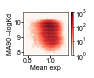

In [4]:
#CH65 MA90 
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_norm_mean', 'MA90_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_norm_mean'], plotting['MA90_mean'],cmap='Reds',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("Mean exp",fontsize=7,labelpad=1)
plt.ylabel("MA90 –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_norm_mean']
y = plotting['MA90_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_norm_mean'], plotting['MA90_mean'])
print(corr)
plt.savefig('images/CH65_exp_vs_MA90.png',transparent=True, dpi=600,bbox_inches='tight')

-0.11588708987639534


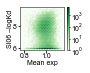

In [5]:
#CH65 SI06 
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_norm_mean', 'SI06_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_norm_mean'], plotting['SI06_mean'],cmap='Greens',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("Mean exp",fontsize=7,labelpad=1)
plt.ylabel("SI06 –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_norm_mean']
y = plotting['SI06_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_norm_mean'], plotting['SI06_mean'])
print(corr)
plt.savefig('images/CH65_exp_vs_SI06.png',transparent=True, dpi=600,bbox_inches='tight')

-0.11298611588107897


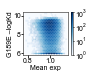

In [6]:
#CH65 G189E 
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CH65_expression[['exp_norm_mean', 'G189E_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_norm_mean'], plotting['G189E_mean'],cmap='Blues',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("Mean exp",fontsize=7,labelpad=1)
plt.ylabel("G189E –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_norm_mean']
y = plotting['G189E_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_norm_mean'], plotting['G189E_mean'])
print(corr)
plt.savefig('images/CH65_exp_vs_G189E.png',transparent=True, dpi=600,bbox_inches='tight')

# change in expression by mutation position

In [19]:
import matplotlib
import matplotlib.colors as mcolors
plt.rcParams.update({'font.size': 7})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5

In [17]:
#read in data
dExp = pd.DataFrame(pd.read_csv('20220603_CH65_dExp.csv',dtype={'source':'str', 'target':'str'}))
dExp

,Mutation,dexp,Number of mutations,dexp_sem,source,target,pos1,pos2,pos3,pos4,...,pos7,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16
0,N26D,0.008725,0,0.060093,0000000000000000,1000000000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N26D,-0.050082,1,0.039410,0000000000000001,1000000000000001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,N26D,-0.020489,1,0.027083,0000000000000010,1000000000000010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,N26D,-0.005048,2,0.020932,0000000000000011,1000000000000011,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,N26D,0.032526,1,0.048260,0000000000000100,1000000000000100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524283,R87K,-0.069743,14,0.089554,1111111111110110,1111111111110111,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
524284,R87K,0.088863,13,0.024843,1111111111111000,1111111111111001,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
524285,R87K,0.035249,14,0.042192,1111111111111010,1111111111111011,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
524286,R87K,-0.070869,14,0.042257,1111111111111100,1111111111111101,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


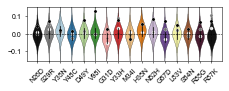

In [21]:
##Expression
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
colors = ['#121212','#808080','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928','#4f1530']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Mutation", y="dexp", data=dExp,scale='count',linewidth=0.25,palette=colors)
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
sns.scatterplot(x="Mutation", y="dexp", data=dExp[(dExp['source']=='0000000000000000')],color='white',s=10)
sns.scatterplot(x="Mutation", y="dexp", data=dExp[(dExp['source']=='0000001010100000')],color='gray',s=10)
sns.scatterplot(x="Mutation", y="dexp", data=dExp[(dExp['target']=='1111111111111111')],color='black',s=10)
ax.set_xticklabels(['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K'],rotation=45)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='y',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_dExp.png',transparent=True, dpi=600,bbox_inches='tight')


# change in expression by number of mutations

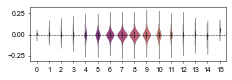

In [22]:
##expression
mutation_names = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="Number of mutations", y="dexp", data=dExp,scale='count',linewidth=0.25,palette='plasma')
plt.xlabel('Mutation position',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='y',
    pad=0,
    labelsize=7)
# ax.set_xticks([])
# ax.set_xticklabels([])
plt.title('', fontsize=10)
plt.xlabel('',fontsize=7,labelpad=0)
plt.ylabel('',fontsize=7,labelpad=1)
plt.savefig('images/CH65_dExp_num.png',transparent=True, dpi=600,bbox_inches='tight')


## do some statistics

In [41]:
pos1

,Mutation,dexp,Number of mutations,dexp_sem,source,target,pos1,pos2,pos3,pos4,...,pos7,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16
0,N26D,0.008725,0,0.060093,0000000000000000,1000000000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N26D,-0.050082,1,0.039410,0000000000000001,1000000000000001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,N26D,-0.020489,1,0.027083,0000000000000010,1000000000000010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,N26D,-0.005048,2,0.020932,0000000000000011,1000000000000011,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,N26D,0.032526,1,0.048260,0000000000000100,1000000000000100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,N26D,-0.024073,14,0.069407,0111111111111011,1111111111111011,0,1,1,1,...,1,1,1,1,1,1,1,0,1,1
32764,N26D,-0.002105,13,0.062477,0111111111111100,1111111111111100,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
32765,N26D,-0.039307,14,0.045332,0111111111111101,1111111111111101,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
32766,N26D,-0.037391,14,0.056485,0111111111111110,1111111111111110,0,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [58]:
summary = pd.DataFrame()
pos1 = pd.DataFrame(dExp[dExp['Mutation']=='N26D'].copy()).rename(columns={'dexp':'dexp_1'})
pos2 = pd.DataFrame(dExp[dExp['Mutation']=='S29R'].copy()).rename(columns={'dexp':'dexp_2'})
# pos3 = dExp[dExp['Mutation']=='Y35N'].copy()
# pos4 = dExp[dExp['Mutation']=='Y48C'].copy()
# pos5 = dExp[dExp['Mutation']=='D49Y'].copy()
# pos6 = dExp[dExp['Mutation']=='V98I'].copy()
# pos7 = dExp[dExp['Mutation']=='G31D'].copy()
# pos8 = dExp[dExp['Mutation']=='Y33H'].copy()
# pos9 = dExp[dExp['Mutation']=='M34I'].copy()
# pos10 = dExp[dExp['Mutation']=='H35N'].copy()
# pos11 = dExp[dExp['Mutation']=='N52H'].copy()
# pos12 = dExp[dExp['Mutation']=='G57D'].copy()
# pos13 = dExp[dExp['Mutation']=='L83V'].copy()
# pos14 = dExp[dExp['Mutation']=='S84N'].copy()
# pos15 = dExp[dExp['Mutation']=='R85G'].copy()
# pos16 = dExp[dExp['Mutation']=='R87K'].copy()
summary['pos1']=pos1['dexp_1'].copy()
summary['pos2']=pos2['dexp_2'].copy()
# summary['pos3']=pos3['dexp'].copy()
# summary['pos4']=pos4['dexp'].copy()
# summary['pos5']=pos5['dexp'].copy()
# summary['pos6']=pos6['dexp'].copy()
# summary['pos7']=pos7['dexp'].copy()
# summary['pos8']=pos8['dexp'].copy()
# summary['pos9']=pos9['dexp'].copy()
# summary['pos10']=pos10['dexp'].copy()
# summary['pos11']=pos11['dexp'].copy()
# summary['pos12']=pos12['dexp'].copy()
# summary['pos13']=pos13['dexp'].copy()
# summary['pos14']=pos14['dexp'].copy()
# summary['pos15']=pos15['dexp'].copy()
# summary['pos16']=pos16['dexp'].copy()
# summary
# values = summary.mean()
# print(values)
# print(min(values),max(values))

,pos1,pos2
0,0.008725,NaN
1,-0.050082,NaN
2,-0.020489,NaN
3,-0.005048,NaN
4,0.032526,NaN
...,...,...
32763,-0.024073,NaN
32764,-0.002105,NaN
32765,-0.039307,NaN
32766,-0.037391,NaN


In [21]:
#do a two-sided t-test to see if mean is different from zero
for pos in range(1,17):   
    vals_1 = np.array(summary['pos%s' % pos])
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(pos,tstat,pval,n1,n2,lab)


In [22]:
# import matplotlib
# import matplotlib.colors as mcolors
# # Try to map values to colors in hex
# # # Taken from here 
# norm = matplotlib.colors.Normalize(vmin=-0.02, vmax=0.02, clip=True)
# mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.bwr)

# colors = np.array(values.apply(lambda x: mcolors.to_hex(mapper.to_rgba(x))))
# colors

In [25]:
# frames = [CH65_pos1,CH65_pos2,CH65_pos3,CH65_pos4,CH65_pos5,CH65_pos6,CH65_pos7,CH65_pos8,CH65_pos9,CH65_pos10,CH65_pos11,CH65_pos12,CH65_pos13,CH65_pos14,CH65_pos15,CH65_pos16]
# CH65_allexp = pd.concat(frames)
# CH65_allexp

In [26]:
# fig, ax = plt.subplots(figsize=(3.5,1))
# ax = sns.violinplot(x="count", y="deltaKd", data=CH65_allexp,palette='plasma',linewidth=0.5)
# plt.xlabel('Number of mutations',fontsize=7,labelpad=0)
# plt.ylabel('Change in mean exp',fontsize=7,labelpad=0)
# plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
# plt.tick_params(
#     axis='both',          # changes apply to the x-axis
#     which='both',
#     pad=0.5,
#     labelsize=7)
# plt.savefig('images/CH65_expbynum.png',transparent=True, dpi=600,bbox_inches='tight')

## CH65: correlation between mean change in expression and mean change in binding for each site

In [28]:
# #MA90
# CH65_pos1 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos1_16muts_0426.csv',delimiter=','))
# CH65_pos2 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos2_16muts_0426.csv',delimiter=','))
# CH65_pos3 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos3_16muts_0426.csv',delimiter=','))
# CH65_pos4 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos4_16muts_0426.csv',delimiter=','))
# CH65_pos5 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos5_16muts_0426.csv',delimiter=','))
# CH65_pos6 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos6_16muts_0426.csv',delimiter=','))
# CH65_pos7 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos7_16muts_0426.csv',delimiter=','))
# CH65_pos8 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos8_16muts_0426.csv',delimiter=','))
# CH65_pos9 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos9_16muts_0426.csv',delimiter=','))
# CH65_pos10 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos10_16muts_0426.csv',delimiter=','))
# CH65_pos11 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos11_16muts_0426.csv',delimiter=','))
# CH65_pos12 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos12_16muts_0426.csv',delimiter=','))
# CH65_pos13 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos13_16muts_0426.csv',delimiter=','))
# CH65_pos14 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos14_16muts_0426.csv',delimiter=','))
# CH65_pos15 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos15_16muts_0426.csv',delimiter=','))
# CH65_pos16 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/MA90_pos16_16muts_0426.csv',delimiter=','))
# summary = pd.DataFrame()
# summary['pos1']=CH65_pos1['deltaKd'].copy()
# summary['pos2']=CH65_pos2['deltaKd'].copy()
# summary['pos3']=CH65_pos3['deltaKd'].copy()
# summary['pos4']=CH65_pos4['deltaKd'].copy()
# summary['pos5']=CH65_pos5['deltaKd'].copy()
# summary['pos6']=CH65_pos6['deltaKd'].copy()
# summary['pos7']=CH65_pos7['deltaKd'].copy()
# summary['pos8']=CH65_pos8['deltaKd'].copy()
# summary['pos9']=CH65_pos9['deltaKd'].copy()
# summary['pos10']=CH65_pos10['deltaKd'].copy()
# summary['pos11']=CH65_pos11['deltaKd'].copy()
# summary['pos12']=CH65_pos12['deltaKd'].copy()
# summary['pos13']=CH65_pos13['deltaKd'].copy()
# summary['pos14']=CH65_pos14['deltaKd'].copy()
# summary['pos15']=CH65_pos15['deltaKd'].copy()
# summary['pos16']=CH65_pos16['deltaKd'].copy()
# MA90 = list(summary.mean())
# MA90_err = list(summary.sem())
# print(MA90)
# print(MA90_err)

In [27]:
# #SI06
# CH65_pos1 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos1_16muts_0426.csv',delimiter=','))
# CH65_pos2 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos2_16muts_0426.csv',delimiter=','))
# CH65_pos3 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos3_16muts_0426.csv',delimiter=','))
# CH65_pos4 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos4_16muts_0426.csv',delimiter=','))
# CH65_pos5 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos5_16muts_0426.csv',delimiter=','))
# CH65_pos6 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos6_16muts_0426.csv',delimiter=','))
# CH65_pos7 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos7_16muts_0426.csv',delimiter=','))
# CH65_pos8 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos8_16muts_0426.csv',delimiter=','))
# CH65_pos9 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos9_16muts_0426.csv',delimiter=','))
# CH65_pos10 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos10_16muts_0426.csv',delimiter=','))
# CH65_pos11 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos11_16muts_0426.csv',delimiter=','))
# CH65_pos12 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos12_16muts_0426.csv',delimiter=','))
# CH65_pos13 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos13_16muts_0426.csv',delimiter=','))
# CH65_pos14 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos14_16muts_0426.csv',delimiter=','))
# CH65_pos15 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos15_16muts_0426.csv',delimiter=','))
# CH65_pos16 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/SI06_pos16_16muts_0426.csv',delimiter=','))
# summary = pd.DataFrame()
# summary['pos1']=CH65_pos1['deltaKd'].copy()
# summary['pos2']=CH65_pos2['deltaKd'].copy()
# summary['pos3']=CH65_pos3['deltaKd'].copy()
# summary['pos4']=CH65_pos4['deltaKd'].copy()
# summary['pos5']=CH65_pos5['deltaKd'].copy()
# summary['pos6']=CH65_pos6['deltaKd'].copy()
# summary['pos7']=CH65_pos7['deltaKd'].copy()
# summary['pos8']=CH65_pos8['deltaKd'].copy()
# summary['pos9']=CH65_pos9['deltaKd'].copy()
# summary['pos10']=CH65_pos10['deltaKd'].copy()
# summary['pos11']=CH65_pos11['deltaKd'].copy()
# summary['pos12']=CH65_pos12['deltaKd'].copy()
# summary['pos13']=CH65_pos13['deltaKd'].copy()
# summary['pos14']=CH65_pos14['deltaKd'].copy()
# summary['pos15']=CH65_pos15['deltaKd'].copy()
# summary['pos16']=CH65_pos16['deltaKd'].copy()
# SI06 = list(summary.mean())
# SI06_err = list(summary.sem())
# print(SI06)
# print(SI06_err)

In [29]:
# #G189E
# CH65_pos1 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos1_16muts_0426.csv',delimiter=','))
# CH65_pos2 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos2_16muts_0426.csv',delimiter=','))
# CH65_pos3 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos3_16muts_0426.csv',delimiter=','))
# CH65_pos4 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos4_16muts_0426.csv',delimiter=','))
# CH65_pos5 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos5_16muts_0426.csv',delimiter=','))
# CH65_pos6 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos6_16muts_0426.csv',delimiter=','))
# CH65_pos7 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos7_16muts_0426.csv',delimiter=','))
# CH65_pos8 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos8_16muts_0426.csv',delimiter=','))
# CH65_pos9 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos9_16muts_0426.csv',delimiter=','))
# CH65_pos10 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos10_16muts_0426.csv',delimiter=','))
# CH65_pos11 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos11_16muts_0426.csv',delimiter=','))
# CH65_pos12 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos12_16muts_0426.csv',delimiter=','))
# CH65_pos13 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos13_16muts_0426.csv',delimiter=','))
# CH65_pos14 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos14_16muts_0426.csv',delimiter=','))
# CH65_pos15 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos15_16muts_0426.csv',delimiter=','))
# CH65_pos16 = pd.DataFrame(pd.read_csv('../Kd_inference/results_CH65/Kds/Change_in_Kd/G189E_pos16_16muts_0426.csv',delimiter=','))
# summary = pd.DataFrame()
# summary['pos1']=CH65_pos1['deltaKd'].copy()
# summary['pos2']=CH65_pos2['deltaKd'].copy()
# summary['pos3']=CH65_pos3['deltaKd'].copy()
# summary['pos4']=CH65_pos4['deltaKd'].copy()
# summary['pos5']=CH65_pos5['deltaKd'].copy()
# summary['pos6']=CH65_pos6['deltaKd'].copy()
# summary['pos7']=CH65_pos7['deltaKd'].copy()
# summary['pos8']=CH65_pos8['deltaKd'].copy()
# summary['pos9']=CH65_pos9['deltaKd'].copy()
# summary['pos10']=CH65_pos10['deltaKd'].copy()
# summary['pos11']=CH65_pos11['deltaKd'].copy()
# summary['pos12']=CH65_pos12['deltaKd'].copy()
# summary['pos13']=CH65_pos13['deltaKd'].copy()
# summary['pos14']=CH65_pos14['deltaKd'].copy()
# summary['pos15']=CH65_pos15['deltaKd'].copy()
# summary['pos16']=CH65_pos16['deltaKd'].copy()
# G189E = list(summary.mean())
# G189E_err = list(summary.sem())
# print(G189E)
# print(G189E_err)

In [30]:
# #merge stuff into a df for plotting
# mutations = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
# data = zip(mutations,expression,error, MA90,MA90_err, SI06,SI06_err)
# toplot = pd.DataFrame()
# toplot = pd.DataFrame(data, columns=['Mut','Exp','Exp_sem', 'MA90','MA90_sem', 'SI06','SI06_sem'])
# toplot['sum']=toplot['MA90']+toplot['SI06']
# toplot['total_err']=((toplot['MA90_sem'])**2+(toplot['SI06_sem']))**(1/2)
# toplot

In [ ]:
# #merge stuff into a df for plotting
# mutations = ['N26D','S29R','Y35N','Y48C','D49Y','V98I','G31D','Y33H','M34I','H35N','N52H','G57D','L83V','S84N','R85G','R87K']
# data = zip(mutations,expression,error, MA90,MA90_err, SI06,SI06_err, G189E,G189E_err)
# toplot = pd.DataFrame()
# toplot = pd.DataFrame(data, columns=['Mut','Exp','Exp_sem', 'MA90','MA90_sem', 'SI06','SI06_sem', 'G189E','G189E_sem'])
# toplot['sum']=toplot['MA90']+toplot['SI06']+toplot['G189E']
# toplot['total_err']=((toplot['MA90_sem'])**2+(toplot['SI06_sem'])**2+(toplot['G189E_sem'])**2)**(1/2)
# toplot

### plot correlation between sum of delta(-logKd) and delta(mean expression bin)

In [31]:
# plt.rcParams['font.sans-serif'] = "Arial"
# plt.rcParams['font.family'] = "sans-serif"
# plt.rcParams['axes.linewidth'] = 0.5
# colors=['#e0e0ff', '#fffcfc', '#ffd2d2', '#ffacac', '#f6f6ff', '#f8f8ff','#f0f0ff', '#fffefe', '#c2c2ff', '#6666ff', '#fffafa', '#ff9a9a','#ffcece', '#ff9a9a', '#ffecec', '#ff7878']
# flierprops = dict(marker='o', markersize=2)
# corr, _ = pearsonr(toplot['Exp'], toplot['MA90'])
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['Exp'], toplot['MA90'])
# plt.figure(figsize=(1,1))
# ax = sns.scatterplot(x='Exp', y='MA90',data=toplot,hue='Mut',s=20,palette=colors,legend=False,edgecolor='black')

# # Find the x,y coordinates for each point
# x_coords = []
# y_coords = []
# for points in ax.collections:
#     for x, y in points.get_offsets():
#         x_coords.append(x)
#         y_coords.append(y)

# # Calculate the type of error to plot as the error bars
# # Make sure the order is the same as the points were looped over
# plt.errorbar(x_coords, y_coords, yerr=toplot['Exp_sem'],xerr=toplot['MA90_sem'], fmt=' ', zorder=-1)



# sns.regplot(x='Exp', y='MA90',data=toplot, scatter=False, ax=ax,color='gray')
# plt.xlim(-0.03,0.03)
# plt.xlabel('Change in mean exp',fontsize=7,labelpad=0.5)
# plt.ylabel('Change in -logKd',fontsize=7,labelpad=0.5)
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,0.5,1],labels=['0','0.5','1'],fontsize=7)
# plt.savefig('expression_figures/CH65_deltaexp_kd_corr_MA90.png',transparent=True, dpi=600,bbox_inches='tight')
# print(corr)

In [32]:
# plt.rcParams['font.sans-serif'] = "Arial"
# plt.rcParams['font.family'] = "sans-serif"
# plt.rcParams['axes.linewidth'] = 0.5
# colors=['#e0e0ff', '#fffcfc', '#ffd2d2', '#ffacac', '#f6f6ff', '#f8f8ff','#f0f0ff', '#fffefe', '#c2c2ff', '#6666ff', '#fffafa', '#ff9a9a','#ffcece', '#ff9a9a', '#ffecec', '#ff7878']
# flierprops = dict(marker='o', markersize=2)
# corr, _ = pearsonr(toplot['Exp'], toplot['SI06'])
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['Exp'], toplot['SI06'])
# plt.figure(figsize=(1,1))
# ax = sns.scatterplot(x='Exp', y='SI06',data=toplot,hue='Mut',s=20,palette=colors,legend=False,edgecolor='black')

# # Find the x,y coordinates for each point
# x_coords = []
# y_coords = []
# for points in ax.collections:
#     for x, y in points.get_offsets():
#         x_coords.append(x)
#         y_coords.append(y)

# # Calculate the type of error to plot as the error bars
# # Make sure the order is the same as the points were looped over
# plt.errorbar(x_coords, y_coords, yerr=toplot['Exp_sem'],xerr=toplot['SI06_sem'], fmt=' ', zorder=-1)



# sns.regplot(x='Exp', y='SI06',data=toplot, scatter=False, ax=ax,color='gray')
# plt.xlim(-0.03,0.03)
# plt.xlabel('Change in mean exp',fontsize=7,labelpad=0.5)
# plt.ylabel('Change in -logKd',fontsize=7,labelpad=0.5)
# plt.xticks(ticks=[-0.03,0,0.03],labels=['-0.03','0','0.03'],fontsize=7)
# plt.yticks(ticks=[0,0.5,1],labels=['0','0.5','1'],fontsize=7)
# plt.savefig('expression_figures/CH65_deltaexp_kd_corr_SI06.png',transparent=True, dpi=600,bbox_inches='tight')
# print(corr)